<div style="border-radius: 5px; padding: 1rem; margin-bottom: 1rem">
<img src="https://www.prototypesforhumanity.com/wp-content/uploads/2022/11/LOGO_UTEC_.png" alt="Banner" width="150" />   
 </div>

# Laboratorio 7: Búsqueda por Similitud en Imágenes 

> **Prof. Heider Sanchez**  
> **ACLs:** Ana María Accilio, Sebastián Loza

## Introducción

El objetivo del laboratorio es aplicar la búsqueda por rango y la búsqueda de los k vecinos más cercanos sobre un conjunto de vectores caracteŕısticos.  

Se toma como referencia un [DataSet de granos secos](https://archive.ics.uci.edu/dataset/602/dry%2Bbean%2Bdataset) el cual contiene los resultados morfométricos del análisis de granos. Cada resultado está representado por un vector característico que toma en cuenta 16 atributos distintos (área, perímetro, eje mayor, eje menor, equidistancia, ecualización, coeficiente de variación, entropía, relación del eje mayor a menor, compacidad, redondez, forma, solidez, elongación, etc.), los cuales son métricas geométricas y de textura obtenidas por procesamiento de imágenes. Además, los granos están agrupados en 7 categorías: Barbunya, Bombay, Cali, Dermason, Horoz, Seker y Sira.


<img src="imagenes/DryBeans.jpg" alt="Banner" width="350" /> 


## **P1. Búsqueda por Rango**  

Implementar en cualquier lenguaje de programación el algoritmo lineal de búsqueda por rango, el cual recibe como parámetro el objeto de consulta y un **radio de cobertura**. Luego usando la Distancia Euclidiana (ED) se retorna todos los elementos que son cubiertos por el radio.  

- Aplique la búsqueda para 3 elementos de la colección (Q15, Q82, Q150) y para cinco valores de radio (r1 < r2 < r3 < r4 < r5).  
- El objeto de consulta debe ser retirado de la colección antes de aplicar la búsqueda.  
- Para saber que valores de radio seleccionar, **debe primero realizar un análisis de la distribución de las distancias computando N veces la distancia entre dos elementos aleatorios de la colección.**
- Para evaluar la efectividad del resultado se debe usar la medida de Precisión ¿Cuántos de los objetos recuperados pertenecen a la misma categoŕıa de la consulta?:  

$
\text{PR} = \frac{\#ObjetosRelevantesRecuperados}{\#ObjetosRecuperados}
$  

A continuación, se proporciona el cuadro que debe ser llenado por el alumno.  

| *PR*           | *Q₁₅*       | *Q₈₂*      | *Q₁₅₀*      |
|----------------|-------------|------------|-------------|
| r1 =           |             |            |             |
| r2 =           |             |            |             |
| r3 =           |             |            |             |
| r4 =           |             |            |             |
| r5 =           |             |            |             |

In [69]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt

data = fetch_ucirepo(id = 602)
df = data.data.features
targets = data.data.targets
df = (df - df.min()) / (df.max() - df.min())
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


### a) Análisis de la distribución de la distancia (con 5000 pares de puntos)

In [70]:
def ED(P, Q):
    return np.sqrt(np.sum(np.square(P - Q)))

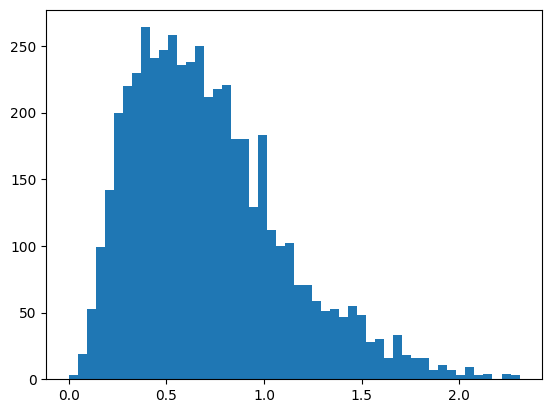

In [71]:
N = 5000
data1 = df.sample(n = N, random_state=1)
data2 = df.sample(n = N, random_state=2)
distance = np.zeros(N)

for i in range(N):
    distance[i] = ED(data1.iloc[i], data2.iloc[i])

plt.hist(distance, bins=50)
plt.show()


### b) Calculo de la búsqueda por rango

In [77]:
def rangeSearch(data, query, radius):
    result = []
    for i in range(len(data)):
        if ED(data.iloc[i], query) <= radius:
            result.append(i)
    return result

In [82]:
radius = [0.1, 0.2, 0.3, 0.4, 0.5]
idxs = [15, 2084, 3560]

for idx in idxs:
    query = df.iloc[idx]
    target = targets.iloc[idx, -1]
    for r in radius:
        result = rangeSearch(df, query, r)
        PR = 0
        for i in result:
            if targets.iloc[i, -1] == target:
                PR += 1
        PR /= len(result)
        print(f"Query: {idx}, Radius: {r}, Results: {len(result)}, PR: {PR}") 

Query: 15, Radius: 0.1, Results: 29, PR: 1.0


KeyboardInterrupt: 

## **P2. Búsqueda KNN**  

Usando los mismos objetos de consulta del ejercicio anterior, implementar y aplicar el algoritmo lineal de búsqueda de los k vecinos más cercanos (KNN) variando el k entre 2, 4, 8, 16, 32.  

**La forma más eficiente de implementar el KNN es gestionando la lista de resultado en una cola de prioridad máxima. Analice la complejidad.**  

PR Q15 Q82 Q150  

| *PR*           | *Q₁₅*       | *Q₈₂*      | *Q₁₅₀*      |
|----------------|-------------|------------|-------------|
| k = 2          |             |            |             |
| k = 4          |             |            |             |
| k = 8          |             |            |             |
| k = 16         |             |            |             |
| k = 32         |             |            |             |

In [ ]:
# Solución Aquí

**Preguntas**  
1. ¿Cuál es la complejidad computacional de ambos métodos de búsqueda en función de cálculos de la ED?  

2. ¿Cuál de los dos métodos de búsqueda usted usaría en un ambiente real de recuperación de la información? Sustente su respuesta.  